# Test Function: Goldstein-Price

## Description
The Goldstein-Price function has a single global minimum, but many local minima and several orders of magnitude difference in range.

$$
f(x_1, x_2) = [1 + (x_1 + x_2 + 1)^2 (19 - 14 x_1 + 3 x_1^2 - 14 x_2 + 6 x_1 x_2 + 3 x_2^2)] \\ \times [30 + (2 x_1 - 3 x_2)^2 (18 - 32 x_1 + 12 x_1^2 + 48 x_2 - 36 x_1 x_2 + 27 x_2^2)]
$$

Global minimum is located at $x^* = f(0, -1)$ and $f(x^*) = 3$.

## Classification
* Continuous
* Differentiable
* Non-Separable
* Non-Scalable
* Multimodal

## References
> A. A. Goldstein, J. F. Price, “On Descent from Local Minima,” Mathematics and Comptutaion, vol. 25, no. 115, pp. 569-574, 1971.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyvista as pv

%matplotlib inline

## Test Function and Surface Generation

In [2]:
def goldstein_price(x):
    """
    goldstein_price evaluates Goldstein-Price function at vector x

    Parameters
    ----------
    x : array
        x is a 2-dimensional vector, [x1, x2]

    Returns
    -------
    float
        scalar result
    """
    a = (x[0] + x[1] + 1)**2
    b = 19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2
    c = (2*x[0] - 3*x[1])**2
    d = 18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2
    return (1. + a*b) * (30. + c*d)


def surface(fx, start=-30, stop=30, num=60):
    """
    surface evaluates fx at regularly spaced grid of points

    Parameters
    ----------
    fx : func
        fx is a vector valued function that returns a scalar result
    start : float
        lower bound of the coordinate grid
    stop : float
        upper bound of the coordinate grid
    num : int
        number of points along one dimension of the grid

    Returns
    -------
    array
        2D array formed by evaluating fx at each grid point
    """
    x = np.linspace(start=start, stop=stop, num=num)
    x1, x2 = np.meshgrid(x, x, indexing='ij')
    X = np.vstack((x1.ravel(), x2.ravel()))
    z = np.apply_along_axis(fx, 0, X).reshape(num,num)
    return x1, x2, z


x1, x2, z = surface(goldstein_price, start=-2, stop=2, num=500)
print(np.min(z), np.max(z), np.mean(z), z.shape)

3.004035498916868 1015687.38907154 53746.73037326544 (500, 500)


## Normalization Functions

Working with normalized z-values improves the rendered surface. Compute some different variations for trial-and-error use below.

In [3]:
def minmax(z):
    """
    minmax returns the min-max normalized form of z
    """
    return (z-z.min())/(z.max()-z.min())


zminmax = minmax(z)
zlog1p = minmax(np.log1p(z))

## Contour Plots

* Filled contour.
* Log scale.
* Perceptually uniform colormap.

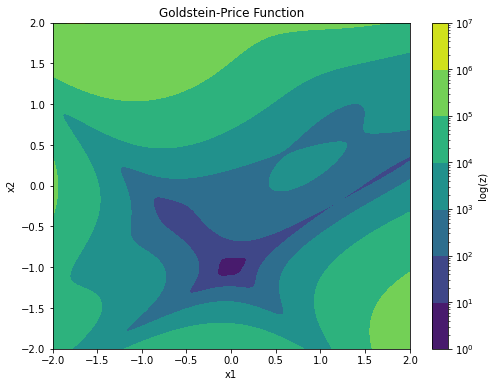

In [4]:
fig = plt.figure(figsize=(8,6))
plt.contourf(x1, x2, z, locator=ticker.LogLocator(), cmap='viridis')
plt.title('Goldstein-Price Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='log(z)')
plt.show()

* Contour line.
* Log scale.
* Perceptually uniform colormap.

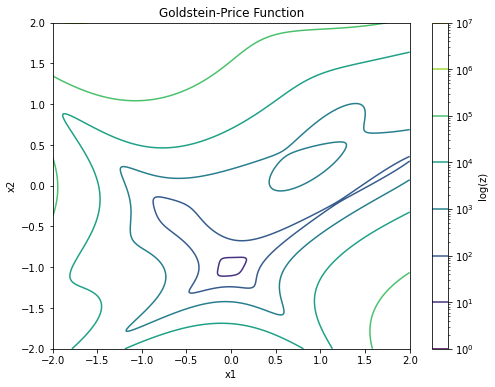

In [5]:
fig = plt.figure(figsize=(8,6))
plt.contour(x1, x2, z, locator=ticker.LogLocator(), cmap='viridis')
plt.title('Goldstein-Price Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='log(z)')
plt.show()

## 3D Surface Plots: matplotlib

* Surface plot.
* Full scale.
* Perceptually uniform colormap.

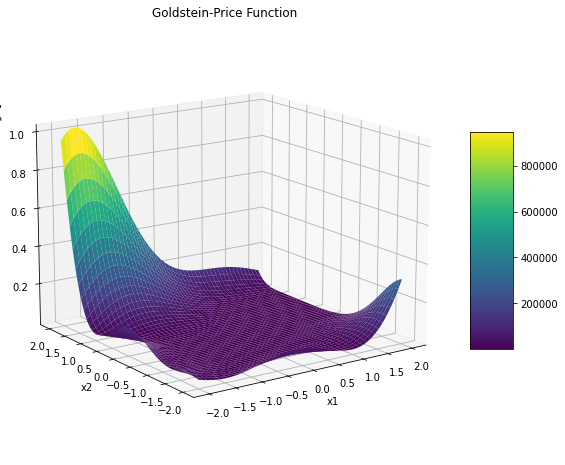

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15., azim=235.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Goldstein-Price Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

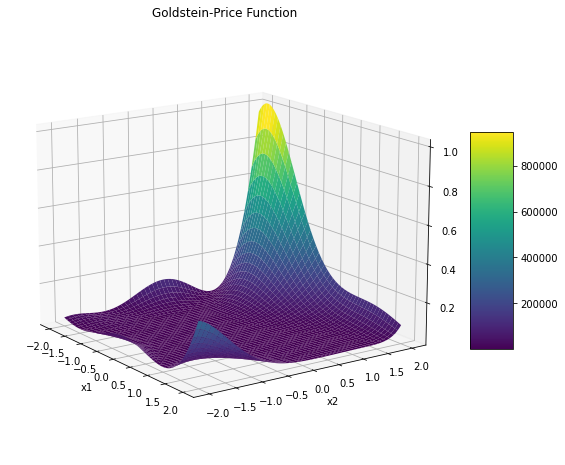

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15., azim=325.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Goldstein-Price Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 3D Surface Plots: pyvista

Create a surface mesh.

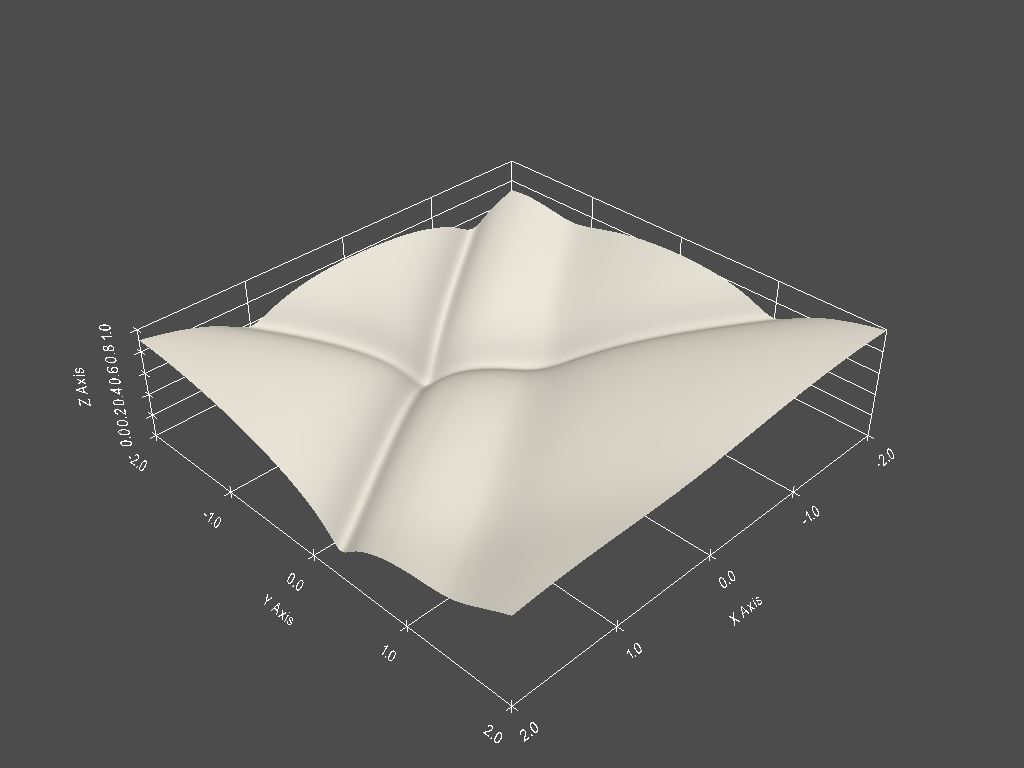

StructuredGrid,Information
N Cells,249001
N Points,250000
X Bounds,"-2.000e+00, 2.000e+00"
Y Bounds,"-2.000e+00, 2.000e+00"
Z Bounds,"0.000e+00, 1.000e+00"
Dimensions,"500, 500, 1"
N Arrays,0


In [8]:
grid = pv.StructuredGrid(x1, x2, zlog1p)
grid.plot(show_grid=True)
grid

In [9]:
grid['scalars'] = zlog1p.flatten("F")
grid

StructuredGrid (0x7fc117b9a5e8)
  N Cells:	249001
  N Points:	250000
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 1.000e+00
  Dimensions:	500, 500, 1
  N Arrays:	1

Repeat the surface plot based on the attached scalars.

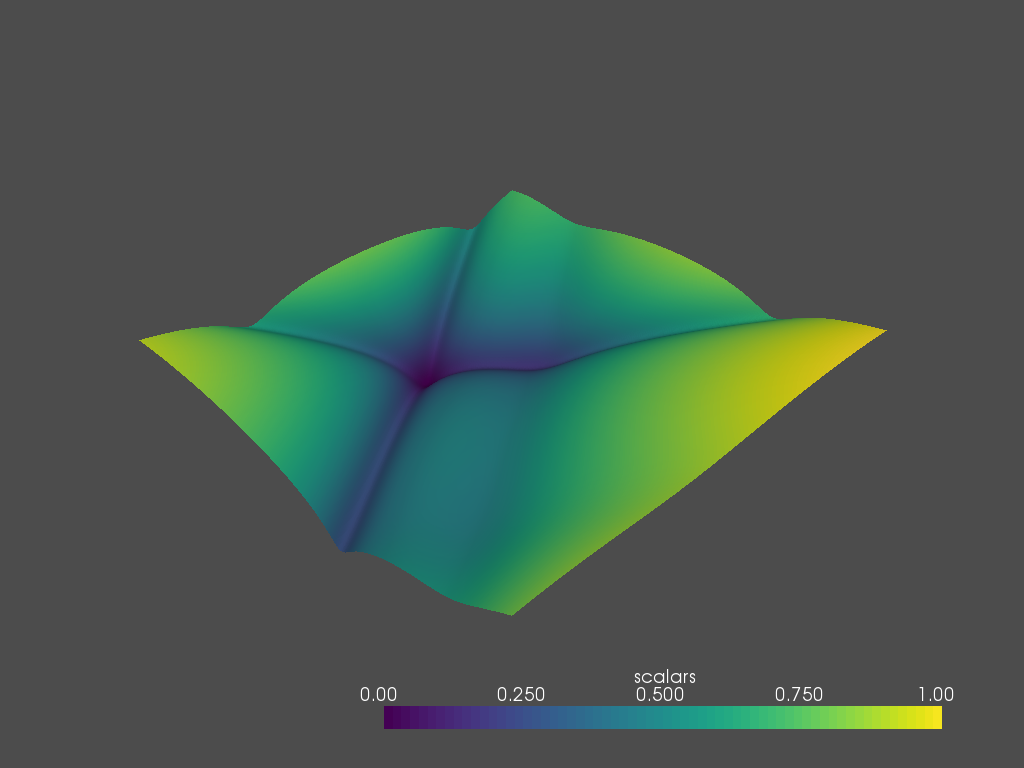

In [10]:
p = pv.Plotter()
p.add_mesh(grid, cmap='viridis')
p.show()

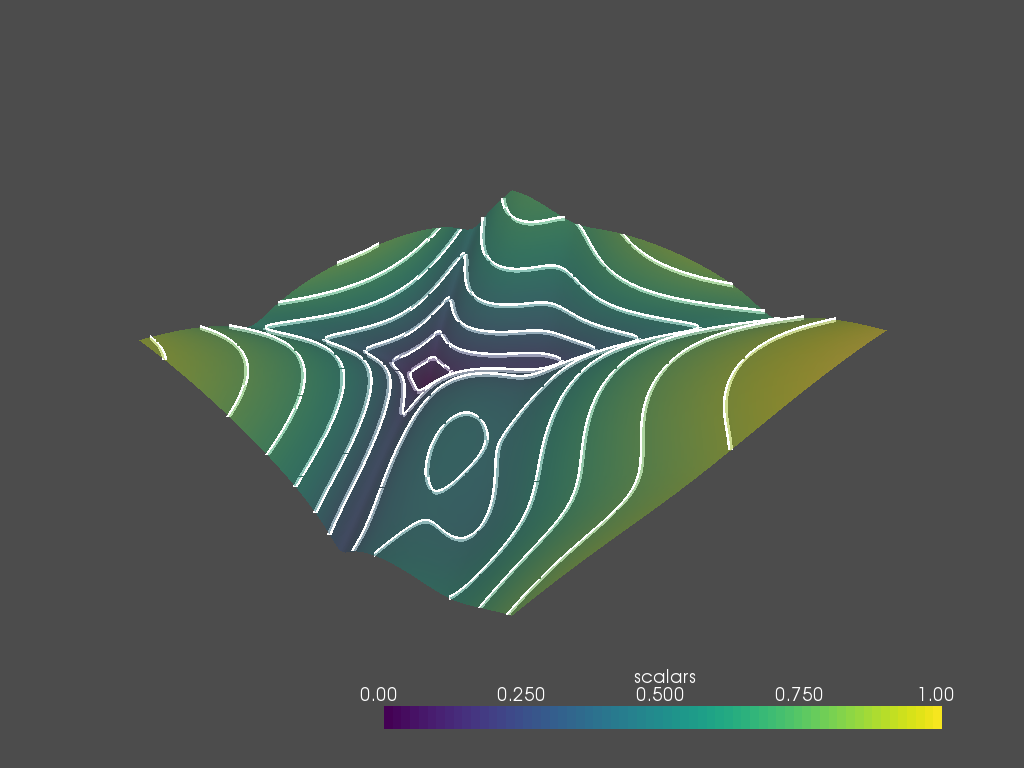

PolyData (0x7fc117bc6c48)
  N Cells:	9537
  N Points:	9553
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	1.111e-01, 8.889e-01
  N Arrays:	1

In [11]:
contours = grid.contour(isosurfaces=10)

p = pv.Plotter()
p.add_mesh(grid, opacity=0.50, cmap='viridis')
p.add_mesh(contours, color="white", line_width=5)
p.show()
contours